In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model, Parameters
import lmfit
import pandas as pd


In [2]:
with open('curve_data.txt', 'r') as txt:
    header = txt.readline()
    line = txt.readline()
    print(header)
    for line in txt:
        print(line.split('\t'))

x	y	dy

['1.2857', '6.9361', '0.3\n']
['2.5714', '4.8991', '0.3\n']
['3.8571', '-1.5914', '0.3\n']
['5.1429', '-2.5532', '0.3\n']
['6.4286', '2.8287', '0.3\n']
['7.7143', '7.1324', '0.3\n']
['9.0000', '4.1764', '0.3\n']


In [3]:
df0 = pd.read_csv('curve_data.txt', sep = '\t')
df0

,x,y,dy
0,0.0000,1.5826,0.3
1,1.2857,6.9361,0.3
2,2.5714,4.8991,0.3
3,3.8571,-1.5914,0.3
4,5.1429,-2.5532,0.3
5,6.4286,2.8287,0.3
6,7.7143,7.1324,0.3
7,9.0000,4.1764,0.3


In [4]:
x = df0['x']
y = df0['y']
dy = df0['dy']


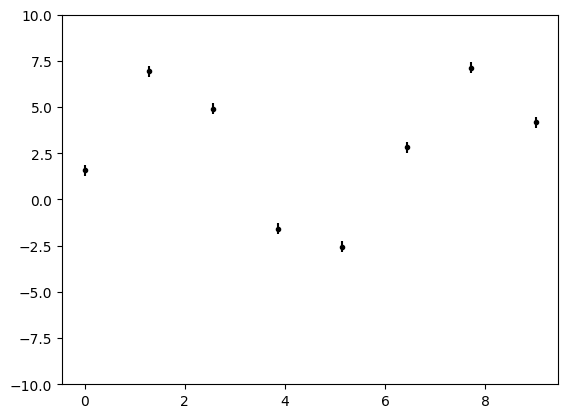

In [5]:
plt.figure()
plt.errorbar(x, y, yerr = dy, fmt = 'k.')
plt.ylim([-10, 10])
plt.show()


In [25]:
def poly(x, **params):
    """
    Polynomial fitting function that takes in a parameter dictionatry which are the polynomial coefficients
    :param x: independent variable
    :param params: keywork argument - dictionary of the form ({'c00': c0, 'c01': c1, etc})
    :return: polynomial function of arbitrary order
    """
    temp= 0.0
    parnames = sorted(params.keys())
    for i, pname in enumerate(parnames):
        temp += params[pname]*x**i
    return temp

c = np.ones(len(x)-3)
# Polynomial fit using poly function
polyModel = Model(poly)

# Parameter names and starting values
polyParams = Parameters()
for j in range(len(c)):
    polyParams.add('C{0:g}'.format(j), value=c[j])
polyResult = polyModel.fit(y, polyParams, x=x)

# polyResult.plot()
# plt.show()


# plt.figure()
# plt.errorbar(x, y, yerr = dy, fmt = 'k.')
# plt.plot(x, polyResult.best_fit)
# plt.show()


print(polyResult.chisqr)
print(polyResult.redchi)

3.113932585466558
1.0379775284888526


In [24]:
def sineFit(x, A, C):
    return(C + A*np.sin(x))

sineModel = lmfit.models.ExpressionModel("C + A*sin(x)")
params = sineModel.make_params(C=1, A=1)

sineResult = sineModel.fit(y, params, x=x)
# sineResult.plot()
# plt.show()

print(sineResult.chisqr)
print(sineResult.redchi)

0.2437957554412642
0.040632625906877363


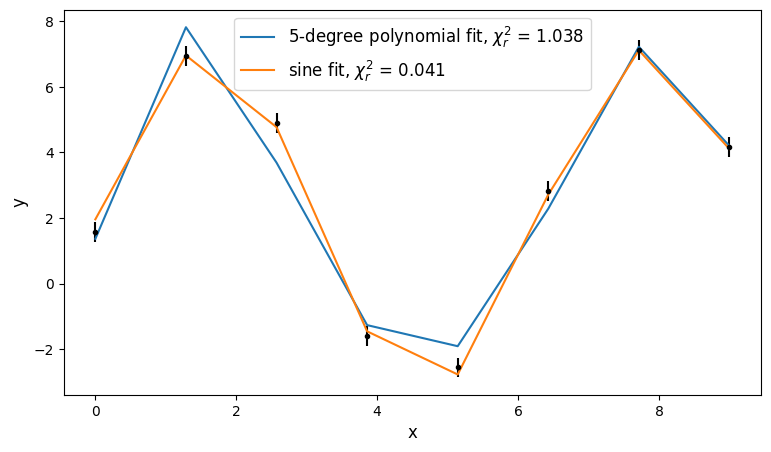

In [41]:
plt.figure(figsize = (9, 5))
plt.errorbar(x, y, yerr = dy, fmt = 'k.')
plt.plot(x, polyResult.best_fit, label = f'{len(c)}-degree polynomial fit, $\chi^2_r$ = {polyResult.redchi:.3f}')
plt.plot(x, sineResult.best_fit, label = f'sine fit, $\chi^2_r$ = {sineResult.redchi:.3f}')
plt.legend(loc = 'best', fontsize = 12)
plt.xlabel('x', fontsize = 12)
plt.ylabel('y', fontsize = 12)
plt.show()